## Weibull Curve 


- C shape curves


The formula for the cumulative distribution function of the Weibull distribution is

The following is the plot of the Weibull cumulative distribution function with the same values of γ as the pdf plots above.


$$
F(x) = 1 - exp(-(x/\lambda)^\gamma)
$$

## References
https://itl.nist.gov/div898/handbook/eda/section3/eda3668.htm

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


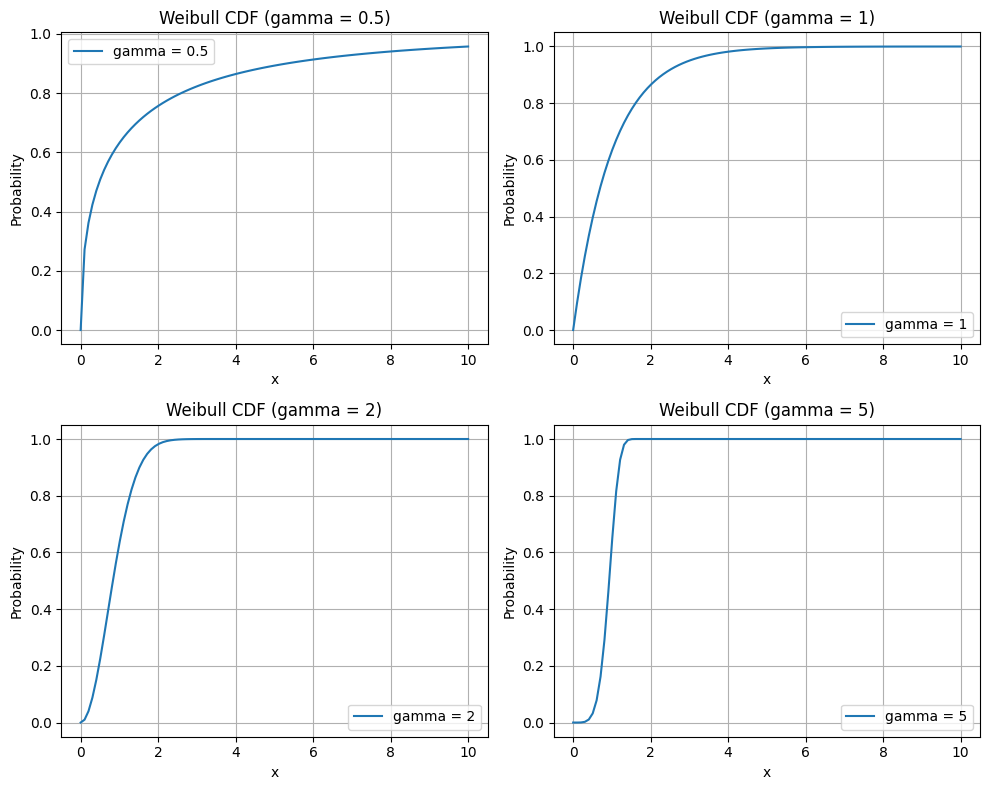

In [212]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Weibull cumulative distribution function (CDF)
def weibull_cdf(x,gamma=1,lb=1):
    return 1 - np.exp(-(x/lb)**gamma)

# Values of x to plot
x = np.linspace(0, 10, 100)

# Values of gamma to plot
gammas = [0.5, 1, 2,5]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot Weibull CDF for different gamma values
for ax, gamma in zip(axes.flatten(), gammas):
    y = weibull_cdf(x, gamma)
    ax.plot(x, y, label=f'gamma = {gamma}')
    ax.set_title(f'Weibull CDF (gamma = {gamma})')
    ax.set_xlabel('x')
    ax.set_ylabel('Probability')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()





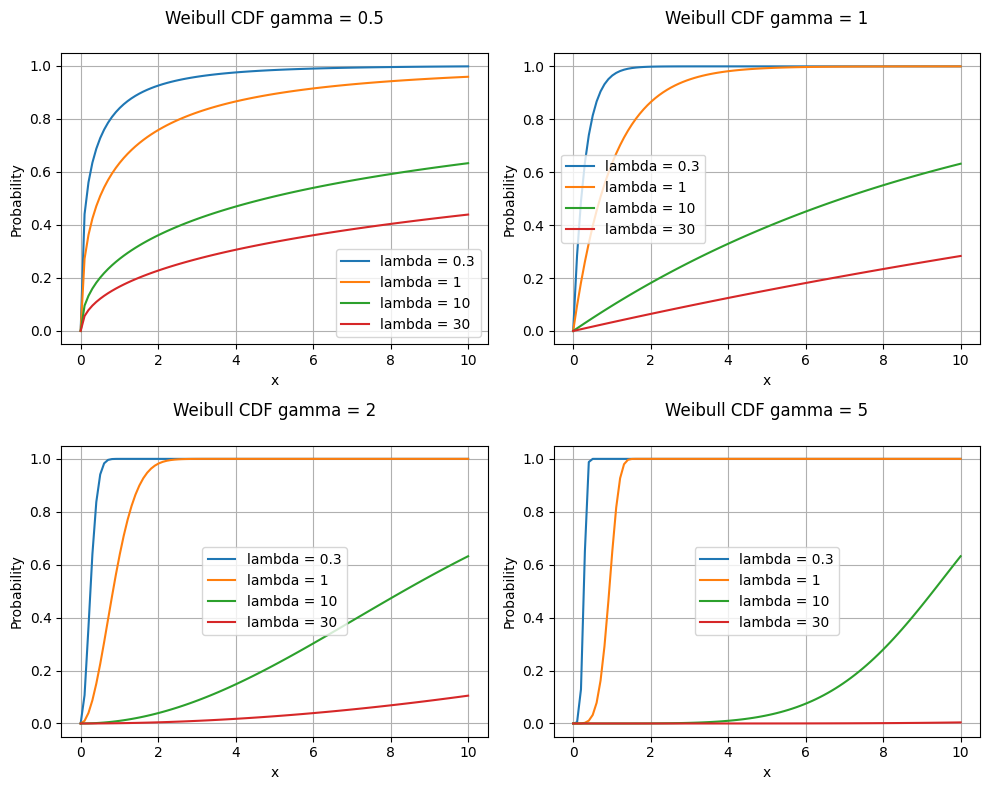

In [215]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Values of gamma to plot
gammas = [0.5, 1, 2,5]
lambdas = [0.3,1,10,30]

# Plot Weibull CDF for different gamma values
for ax, gamma in zip(axes.flatten(), gammas):
    for lb in lambdas:
        y = weibull_cdf(x, gamma=gamma,lb=lb)
        ax.plot(x, y, label=f'lambda = {lb}')
        ax.set_title(f'Weibull CDF gamma = {gamma}\n')
        ax.set_xlabel('x')
        ax.set_ylabel('Probability')
        ax.legend()
        ax.grid(True)

plt.tight_layout()
plt.show()

In [53]:


def roas(x):
    # ROAS decreases slightly after a certain point
    initial_roas = 1.5  # Initial ROAS before diminishing returns
    decay_rate = 0.003  # Rate at which ROAS decreases
    base_roas = 0.6     # Minimum base ROAS value
    return initial_roas * np.exp(-decay_rate * (x - 200)) + base_roas

def marginal_roas(x):
    # Marginal ROAS declines faster than cumulative ROAS
    initial_marginal_roas = 2.0  # Initial Marginal ROAS before diminishing returns
    decay_rate = 0.01  # Rate at which Marginal ROAS decreases
    return initial_marginal_roas * np.exp(-decay_rate * x)



In [227]:
# Define the x-axis values (Average Weekly HH GRPs)
x = np.linspace(1, 70, 100)

BETA_COEFF = 60
# Define the functions for the curves
def incremental_volume(x,gamma=3,_lambda=30):
    return BETA_COEFF * (1 - np.exp(-(x/_lambda)**gamma))


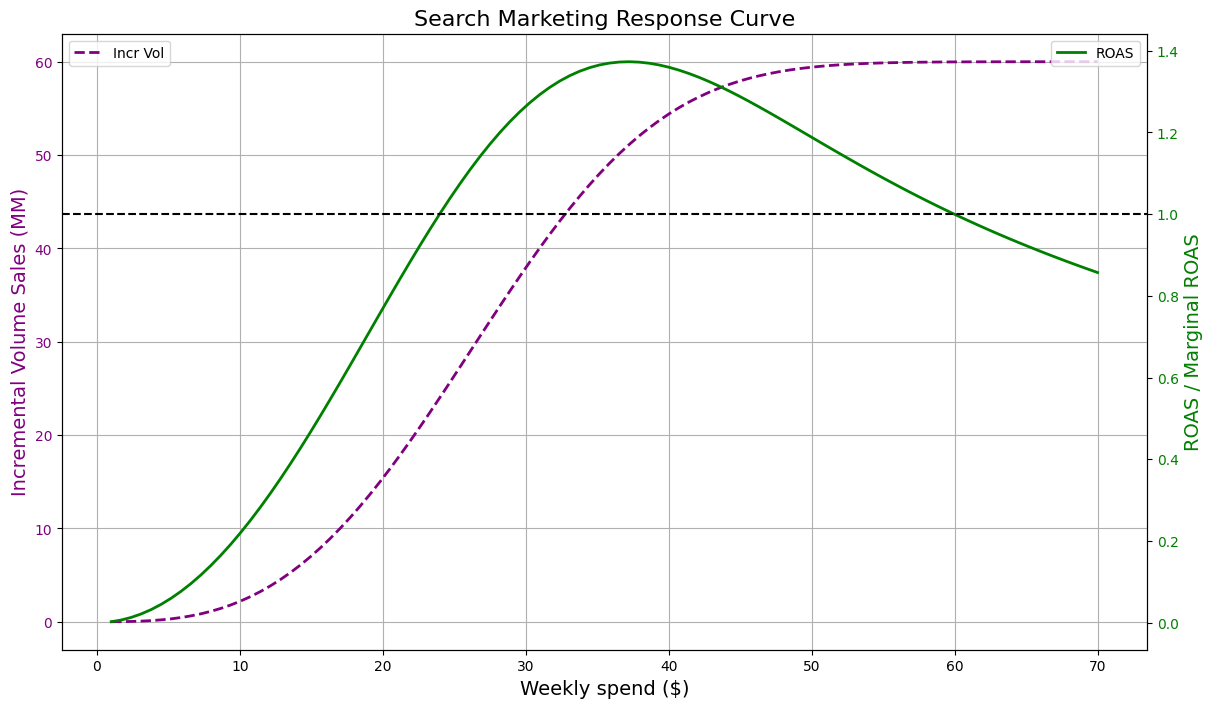

In [228]:
# Compute the y-values for each curve
y_incremental_volume = incremental_volume(x)
y_roas = y_incremental_volume /x
y_marginal_roas = marginal_roas(x)

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Incremental Volume Sales (dashed line)
ax1.plot(x, y_incremental_volume, ls='--', label='Incr Vol', color='purple', linewidth=2)
ax1.set_xlabel('Weekly spend ($)', fontsize=14)
ax1.set_ylabel('Incremental Volume Sales (MM)', fontsize=14, color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.legend(loc='upper left')

# Plot ROAS (solid green line)
ax2 = ax1.twinx()
ax2.plot(x, y_roas, ls='-', label='ROAS', color='green', linewidth=2)
ax2.set_ylabel('ROAS / Marginal ROAS', fontsize=14, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Plot Marginal ROAS (solid blue line)
# ax2.plot(x, y_marginal_roas, ls='-', label='Marginal ROAS', color='blue', linewidth=2)
# ax2.legend(loc='center right')

# # Highlight optimal range
# plt.axvspan(130, 225, color='grey', alpha=0.2, label='Optimal Range')

# Annotate specific points and values
# ax1.axvline(x=optimal_point, color='black', linestyle='--')
# ax1.text(optimal_point + 10, 45, '2022 Avg Wkly Execution\n292 HH GRPs', horizontalalignment='left', fontsize=12)

ax2.axhline(1,ls='--',lw=1.5,label='ROI',color='black')

# ax2.annotate('Cumulative ROAS = $1.08', 
#              xy=(optimal_point, roas(optimal_point)), xytext=(optimal_point + 50, roas(optimal_point) + 0.2),
#              arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

# ax2.annotate('Marginal ROAS = $0.79', xy=(optimal_point, marginal_roas(optimal_point)), xytext=(optimal_point + 50, marginal_roas(optimal_point) - 0.1),
#              arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

# Add titles and grid
plt.title('Search Marketing Response Curve', fontsize=16)
ax1.grid(True)
plt.show()


/tmp/ipykernel_176/2982145462.py:23: RuntimeWarning: divide by zero encountered in divide
  return pdf / x
/tmp/ipykernel_176/2982145462.py:17: RuntimeWarning: invalid value encountered in divide
  return cdf / x


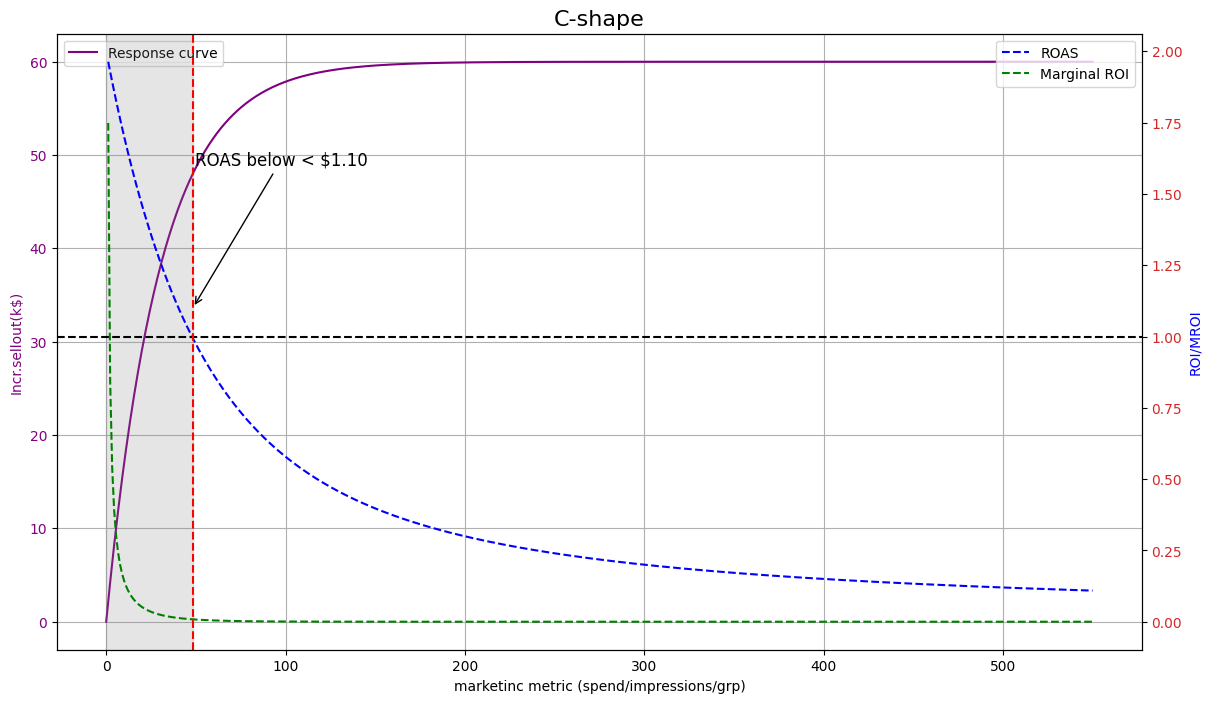

In [262]:
# Gamma value for the Weibull distribution
gamma = 1


def weibull_cdf(x, gamma=3, lb=30):
    return (1 - np.exp(-(x/lb)**gamma))


# Define the Weibull probability density function (PDF) with scale parameter lb
def weibull_pdf(x, gamma, lb=50):
    return (gamma/lb) * (x/lb)**(gamma - 1) * np.exp(-(x/lb)**gamma)


# Define the ROI
def roi(x, gamma, lb):
    cdf = weibull_cdf(x, gamma, lb)
    return cdf / x


# Define the Marginal ROI
def marginal_roi(x, gamma, lb):
    pdf = weibull_pdf(x, gamma, lb)
    return pdf / x




# Calculate CDF and PDF values
cdf_values = BETA_COEFF* weibull_cdf(x, gamma)
# pdf_values = BETA_COEFF*weibull_pdf(x, gamma)
marginal_roi_values = BETA_COEFF*marginal_roi(x, gamma, lb)
roi_values = BETA_COEFF*roi(x, gamma, lb)


fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.set_xlabel('marketinc metric (spend/impressions/grp)')
ax1.set_ylabel('Incr.sellout(k$)', color='purple')
ax1.plot(x, cdf_values, ls='-',color='purple', label='Response curve')

ax1.tick_params(axis='y', labelcolor='purple')
ax1.legend(loc='best')

ax2 = ax1.twinx()
ax2.set_ylabel('ROI/MROI', color='blue')
ax2.plot(x, roi_values, color='blue', linestyle='--', label='ROAS')
# ax2.plot(x, pdf_values, color='blue', ls='--',label='ROI')
ax2.plot(x, marginal_roi_values, color='green',ls='--', label='Marginal ROI')
ax2.axhline(1,color='black',ls='--')

ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')


datum= pd.DataFrame({'spend':x,'roi':roi_values,'mroi':marginal_roi_values})
x_max_spend_roi = datum[datum['roi'] <1]['spend'].iloc[0]
max_roas_value = datum[datum['roi'] == datum['roi'].max() ]['spend'].iloc[0]




ax2.annotate(f'ROAS below < ${max_roas_value:.2f}', 
             xy=(x_max_spend_roi ,max_roas_value),
             xytext=(x_max_spend_roi+ 1 , max_roas_value+0.5 ),
             arrowprops=dict(facecolor='black', arrowstyle='->'), 
            fontsize=12)



ax2.axvline(x_max_spend_roi,color='red',ls='--')

plt.axvspan(0, x_max_spend_roi, color='grey', alpha=0.2, label='Optimal Range')


plt.title('C-shape', fontsize=16)
ax1.grid(True)



plt.show()





## s-shape

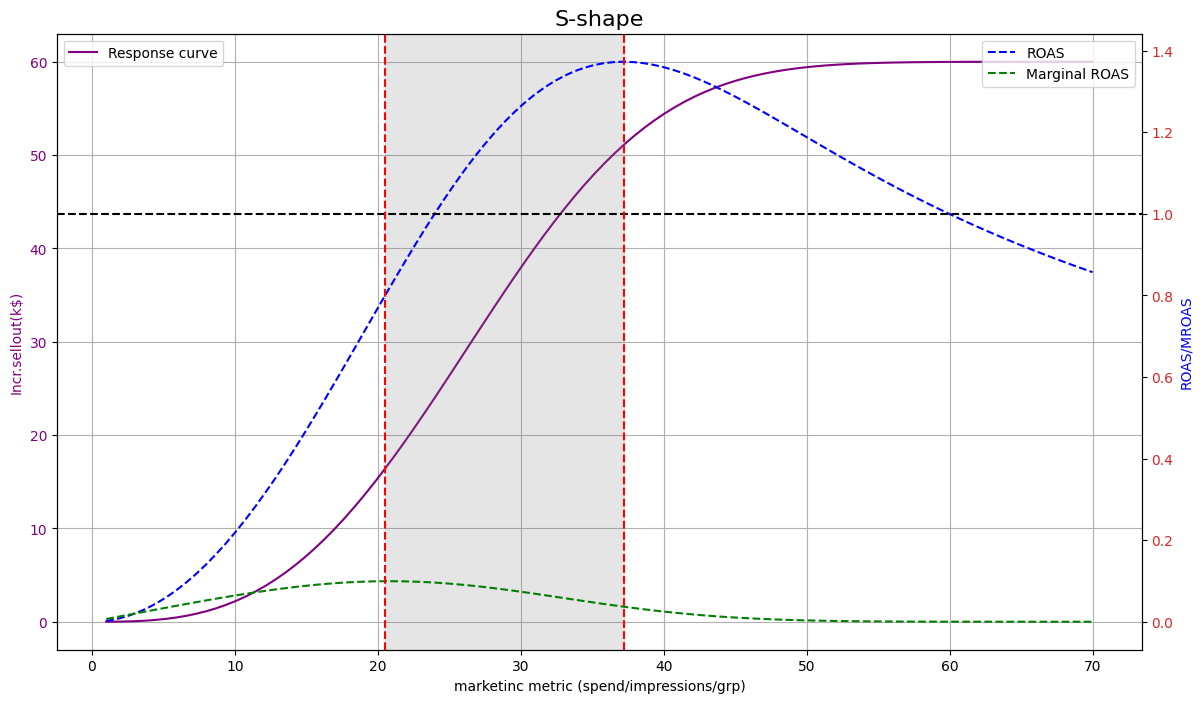

In [271]:



# Gamma value for the Weibull distribution
gamma = 3
BETA_COEFF = 60
x = np.linspace(1, 70, 100)






# Calculate CDF and PDF values
cdf_values = BETA_COEFF* weibull_cdf(x, gamma)
# pdf_values = BETA_COEFF*weibull_pdf(x, gamma)
marginal_roi_values = BETA_COEFF*marginal_roi(x, gamma, lb)
roi_values = BETA_COEFF*roi(x, gamma, lb)


fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.set_xlabel('marketinc metric (spend/impressions/grp)')
ax1.set_ylabel('Incr.sellout(k$)', color='purple')
ax1.plot(x, cdf_values, ls='-',color='purple', label='Response curve')

ax1.tick_params(axis='y', labelcolor='purple')
ax1.legend(loc='best')

ax2 = ax1.twinx()
ax2.set_ylabel('ROAS/MROAS', color='blue')
ax2.plot(x, roi_values, color='blue', linestyle='--', label='ROAS')
# ax2.plot(x, pdf_values, color='blue', ls='--',label='ROI')
ax2.plot(x, marginal_roi_values, color='green',ls='--', label='Marginal ROAS')
ax2.axhline(1,color='black',ls='--')

ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')


datum= pd.DataFrame({'spend':x,'roi':roi_values,'mroi':marginal_roi_values})
x_max_spend_roi = datum[datum['roi'] == datum['roi'].max() ]['spend'].iloc[0]
max_roas_value = datum[datum['roi'] == datum['roi'].max() ]['spend'].iloc[0]
x_max_spend_mroi = datum[datum['mroi'] == datum['mroi'].max() ]['spend'].iloc[0]




# ax2.annotate(f'ROAS below < ${max_roas_value:.2f}', 
#              xy=(x_max_spend_roi ,max_roas_value),
#              xytext=(x_max_spend_roi+ 1 , max_roas_value+0.5 ),
#              arrowprops=dict(facecolor='black', arrowstyle='->'), 
#             fontsize=12)



ax2.axvline(x_max_spend_roi,color='red',ls='--')


ax2.axvline(x_max_spend_mroi,color='red',ls='--')


plt.axvspan(x_max_spend_mroi, x_max_spend_roi, color='grey', alpha=0.2, label='Optimal Range')


plt.title('S-shape', fontsize=16)
ax1.grid(True)



plt.show()





In [264]:
# x = np.linspace(0, 550, 500)


# fig, ax1 = plt.subplots(figsize=(14, 8))

# for  beta in [0.1,0.5,1.,1.5,3,6]:
#     y_incremental_volume = weibull_transform(x,cte=50,beta=beta)
#     ax1.plot(x, y_incremental_volume, label=f'beta : {beta}', linewidth=2)
#     ax1.set_xlabel('Avg. Weekly HH GRPs', fontsize=14)
#     ax1.set_ylabel('Incremental Volume Sales (MM)', fontsize=14, color='black')
#     ax1.tick_params(axis='y', labelcolor='purple')
#     ax1.legend(loc='upper left')

# ax1.grid(True)
# plt.show()
# plt.close()
